In [228]:
class VisualizeHelper:
    
    def ShowTable(self):
        print(cars)
    
    def ShowInfo(self):
        print(cars.info())
        
    def ShowBrandsChart(self):
        print(cars['Vehicle_brand'].value_counts().plot(kind='bar', figsize=(15, 5)))
        
    def ShowBoxChart(self):
        cars['Price'].plot(kind='box')
        print(plt.show())
        cars['Production_year'].plot(kind='box')
        print(plt.show())

In [229]:
class OptimizationHelper:
        
    def OptimizeColumns(self, cars):
        cars = cars.drop('Index', axis=1)
        cars = cars.drop('Features', axis=1)
        cars = cars.drop('Offer_location', axis=1)
        cars = cars.drop('Offer_publication_date', axis=1)
        cars = cars.drop('First_registration_date', axis=1)
        cars = cars.drop('CO2_emissions', axis=1)
        cars = cars.drop('Vehicle_version', axis=1)
        cars = cars.drop('Vehicle_generation', axis=1)
        cars = cars.drop('Currency', axis=1)
        cars = cars.drop('Origin_country', axis=1)
        cars = cars.drop('First_owner', axis=1)
        return cars
        
    def OptimizeBrands(self, cars):
        brandsToLeave = cars.groupby(['Vehicle_brand'])['Vehicle_brand'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)['Vehicle_brand'].tolist()

        cars = cars[cars['Vehicle_brand'].isin(brandsToLeave)]
        return cars
        
    def OptimizeNulls(self, cars):
        cars = cars.dropna()
        return cars
        
    def OptimizePrices(self, cars):
        cars = cars.drop(cars[cars.Price > 800000].index)
        return cars
        
    def OptimizeYears(self, cars):
        cars = cars.drop(cars[cars.Production_year < 1940].index)
        return cars


In [230]:
class FeatureEngineeringHelper:

    def OneHotEncoding(self, cars):
        columnsToChange = ['Condition', 'Vehicle_brand', 'Vehicle_model', 'Fuel_type', 'Drive', 'Transmission', 'Type', 'Colour']
        
        for column_name, column_data in cars.items():
            if column_name in columnsToChange:
                dummies = pd.get_dummies(cars[column_name])
                cars = pd.merge(
                    left=cars,
                    right=dummies,
                    left_index=True,
                    right_index=True,
                )
                cars = cars.drop(column_name, axis=1)
        return cars

In [231]:
class DataAnalizisHelper:
    
    def __init__(self, cars):
        self.cars = cars  
        
    def CorrelationMatrix(self):
        self.cars = self.cars.drop('Vehicle_model', axis=1)
        self.cars = self.cars.drop('Power_HP', axis=1)
        self.cars = self.cars.drop('Displacement_cm3', axis=1)
        self.cars = self.cars.drop('Doors_number', axis=1)
        
        columnsToChange = ['Condition', 'Vehicle_brand', 'Vehicle_model', 'Fuel_type', 'Drive', 'Transmission', 'Type', 'Colour']
        
        for (columnName, columnData) in self.cars.items():
            if columnName in columnsToChange:
                dummies = pd.get_dummies(self.cars[columnName])
                self.cars = pd.merge(
                    left=self.cars,
                    right=dummies,
                    left_index=True,
                    right_index=True,
                )
                self.cars = self.cars.drop(columnName, axis=1)
        
        correlations = self.cars.corr()
        fig, ax = plt.subplots(figsize=(30, 30))

        colormap = sns.color_palette("BrBG", 10)

        sns.heatmap(correlations, 
            cmap=colormap, 
            annot=True, 
            fmt=".2f")

        plt.show()

In [232]:
class Coach:
    
    def TrainModel(self, classifier, feature_vector_train, label, feature_vector_valid):
        # train model
        classifier.fit(feature_vector_train, label)

        with open('titanic_classifier.pickle', 'wb') as handle:
            pickle.dump(classifier, handle)
            
        predictions = classifier.predict(feature_vector_valid)
        score_vals = [
        metrics.mean_squared_error(predictions, y_test, squared=False),
        metrics.mean_absolute_error(predictions, y_test)
        ]
        return score_vals

In [233]:
class UnitTests:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def CheckPriceAbove(self, price):
        condition = self.dataframe['Price'] > price
        result = self.dataframe[condition]
        if len(result) > 0:
            print("Tak, istnieją samochody o cenie powyżej", price, ".")
        else:
            print("Nie, nie ma samochodów o cenie powyżej", price, ".")
            
    def CheckProductionYear(self, year):
        condition = self.dataframe['Production_year'] < year
        result = self.dataframe[condition]
        if len(result) > 0:
            print("Tak, istnieją samochody wyprodukowane przed", year, ".")
        else:
            print("Nie, nie ma samochodów wyprodukowanych przed", year, ".")
            
    def CheckNullValues(self):
        null_values_exist = self.dataframe.isnull().values.any()
        if null_values_exist:
            print("W tabeli danych występują wartości null.")
        else:
            print("W tabeli danych nie ma wartości null.")

In [234]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import pickle

cars = pd.read_csv("Car_sale_ads.csv")

vizualizer = VisualizeHelper()
optimalizer = OptimizationHelper()
featureEngineering = FeatureEngineeringHelper()

print("OK")

OK


         Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0            0  86200      PLN       New        Abarth           595   
1            1  43500      PLN      Used        Abarth         Other   
2            2  44900      PLN      Used        Abarth           500   
3            3  39900      PLN      Used        Abarth           500   
4            4  97900      PLN       New        Abarth           595   
...        ...    ...      ...       ...           ...           ...   
208299  208299  39900      PLN      Used           Żuk         Other   
208300  208300  10900      PLN      Used           Żuk         Other   
208301  208301   6900      PLN      Used           Żuk         Other   
208302  208302   5700      PLN      Used           Żuk         Other   
208303  208303  11900      PLN      Used           Żuk         Other   

       Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0                  NaN                NaN             20

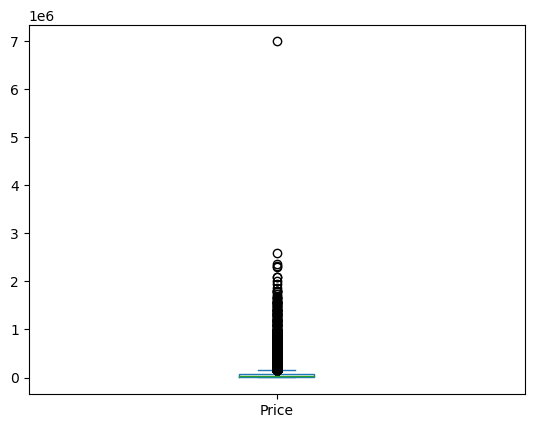

None


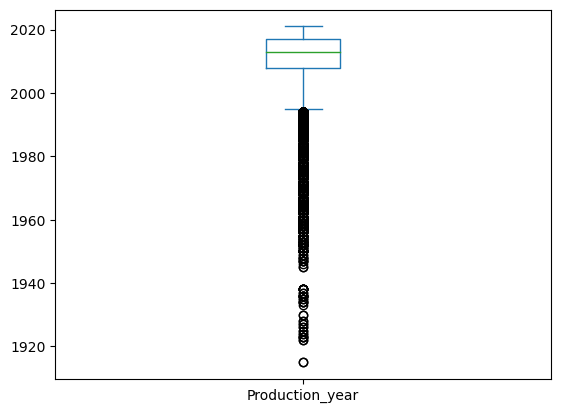

None


In [235]:
#Przedstawienie danych
vizualizer.ShowTable()
vizualizer.ShowInfo()
vizualizer.ShowBoxChart()

In [236]:
#Optymalizacja
cars = optimalizer.OptimizeColumns(cars)
cars = optimalizer.OptimizeBrands(cars)
cars = optimalizer.OptimizeNulls(cars)
cars = optimalizer.OptimizePrices(cars)
cars = optimalizer.OptimizeYears(cars)

print("OK")

OK


<class 'pandas.core.frame.DataFrame'>
Index: 77249 entries, 1550 to 202274
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             77249 non-null  int64  
 1   Condition         77249 non-null  object 
 2   Vehicle_brand     77249 non-null  object 
 3   Vehicle_model     77249 non-null  object 
 4   Production_year   77249 non-null  int64  
 5   Mileage_km        77249 non-null  float64
 6   Power_HP          77249 non-null  float64
 7   Displacement_cm3  77249 non-null  float64
 8   Fuel_type         77249 non-null  object 
 9   Drive             77249 non-null  object 
 10  Transmission      77249 non-null  object 
 11  Type              77249 non-null  object 
 12  Doors_number      77249 non-null  float64
 13  Colour            77249 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 8.8+ MB
None


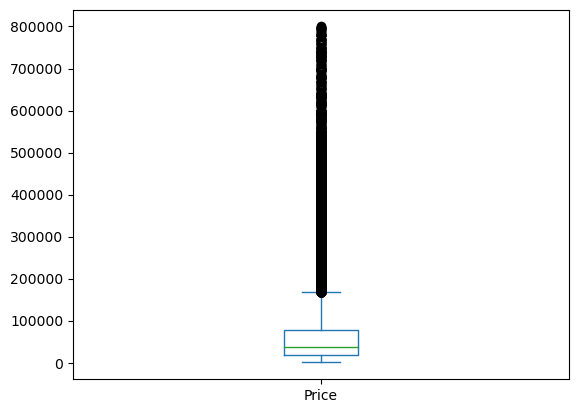

None


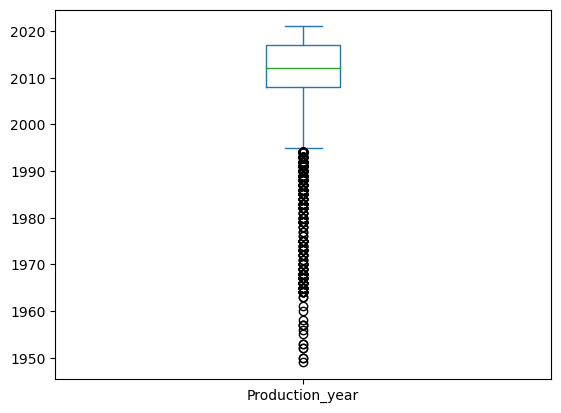

None
Axes(0.125,0.11;0.775x0.77)
        Price Condition Vehicle_brand Vehicle_model  Production_year  \
1550     5900      Used          Audi           100             1992   
1551     6900      Used          Audi           100             1991   
1552     5000      Used          Audi           100             1993   
1554    14999      Used          Audi           100             1987   
1555    15000      Used          Audi           100             1990   
...       ...       ...           ...           ...              ...   
202270   2800      Used    Volkswagen         Vento             1997   
202271   4300      Used    Volkswagen         Vento             1992   
202272   2900      Used    Volkswagen         Vento             1993   
202273   4600      Used    Volkswagen         Vento             1996   
202274   5400      Used    Volkswagen         Vento             1997   

        Mileage_km  Power_HP  Displacement_cm3       Fuel_type  \
1550      262000.0     101.0        

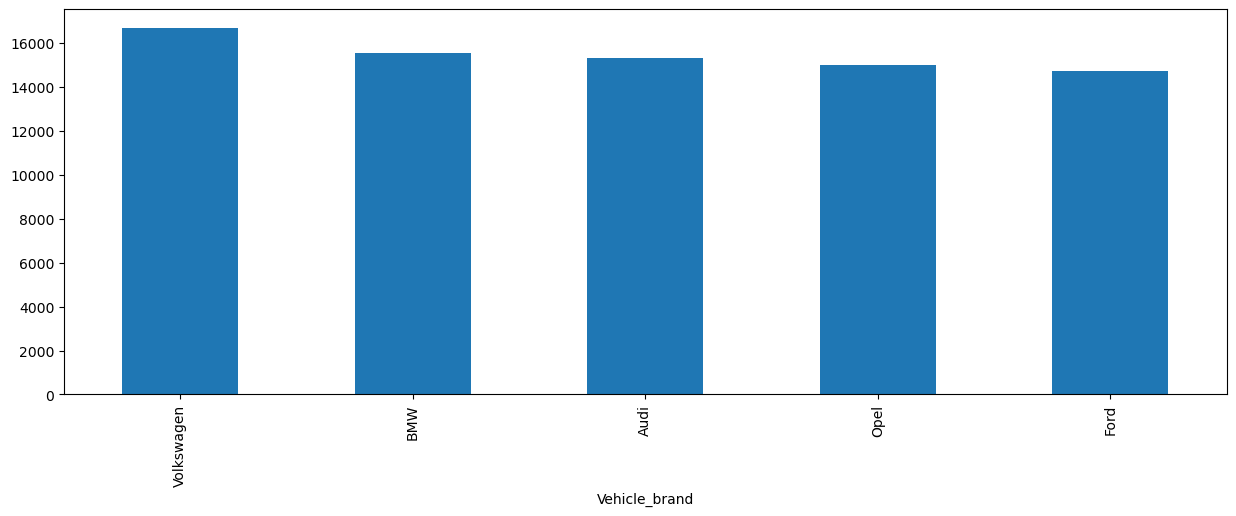

In [237]:
#Przedstawienie po optymalizacji
vizualizer.ShowInfo()
vizualizer.ShowBoxChart()
vizualizer.ShowBrandsChart()
vizualizer.ShowTable()

In [238]:
#Przygotowanie danych dla macierzy korelacji
dataAnalizis = DataAnalizisHelper(cars)

#FeatureEngineering
cars = featureEngineering.OneHotEncoding(cars)

vizualizer.ShowTable()

        Price  Production_year  Mileage_km  Power_HP  Displacement_cm3  \
1550     5900             1992    262000.0     101.0            1984.0   
1551     6900             1991    332000.0     174.0            2771.0   
1552     5000             1993    500000.0     150.0            2598.0   
1554    14999             1987    108729.0     137.0            2226.0   
1555    15000             1990    235726.0     115.0            1994.0   
...       ...              ...         ...       ...               ...   
202270   2800             1997    268169.0      90.0            1896.0   
202271   4300             1992    272855.0      90.0            1781.0   
202272   2900             1993    245000.0      90.0            1781.0   
202273   4600             1996    290000.0      90.0            1896.0   
202274   5400             1997    415000.0      90.0            1896.0   

        Doors_number    New  Used   Audi    BMW  ...  burgundy  golden   gray  \
1550             4.0  False  T

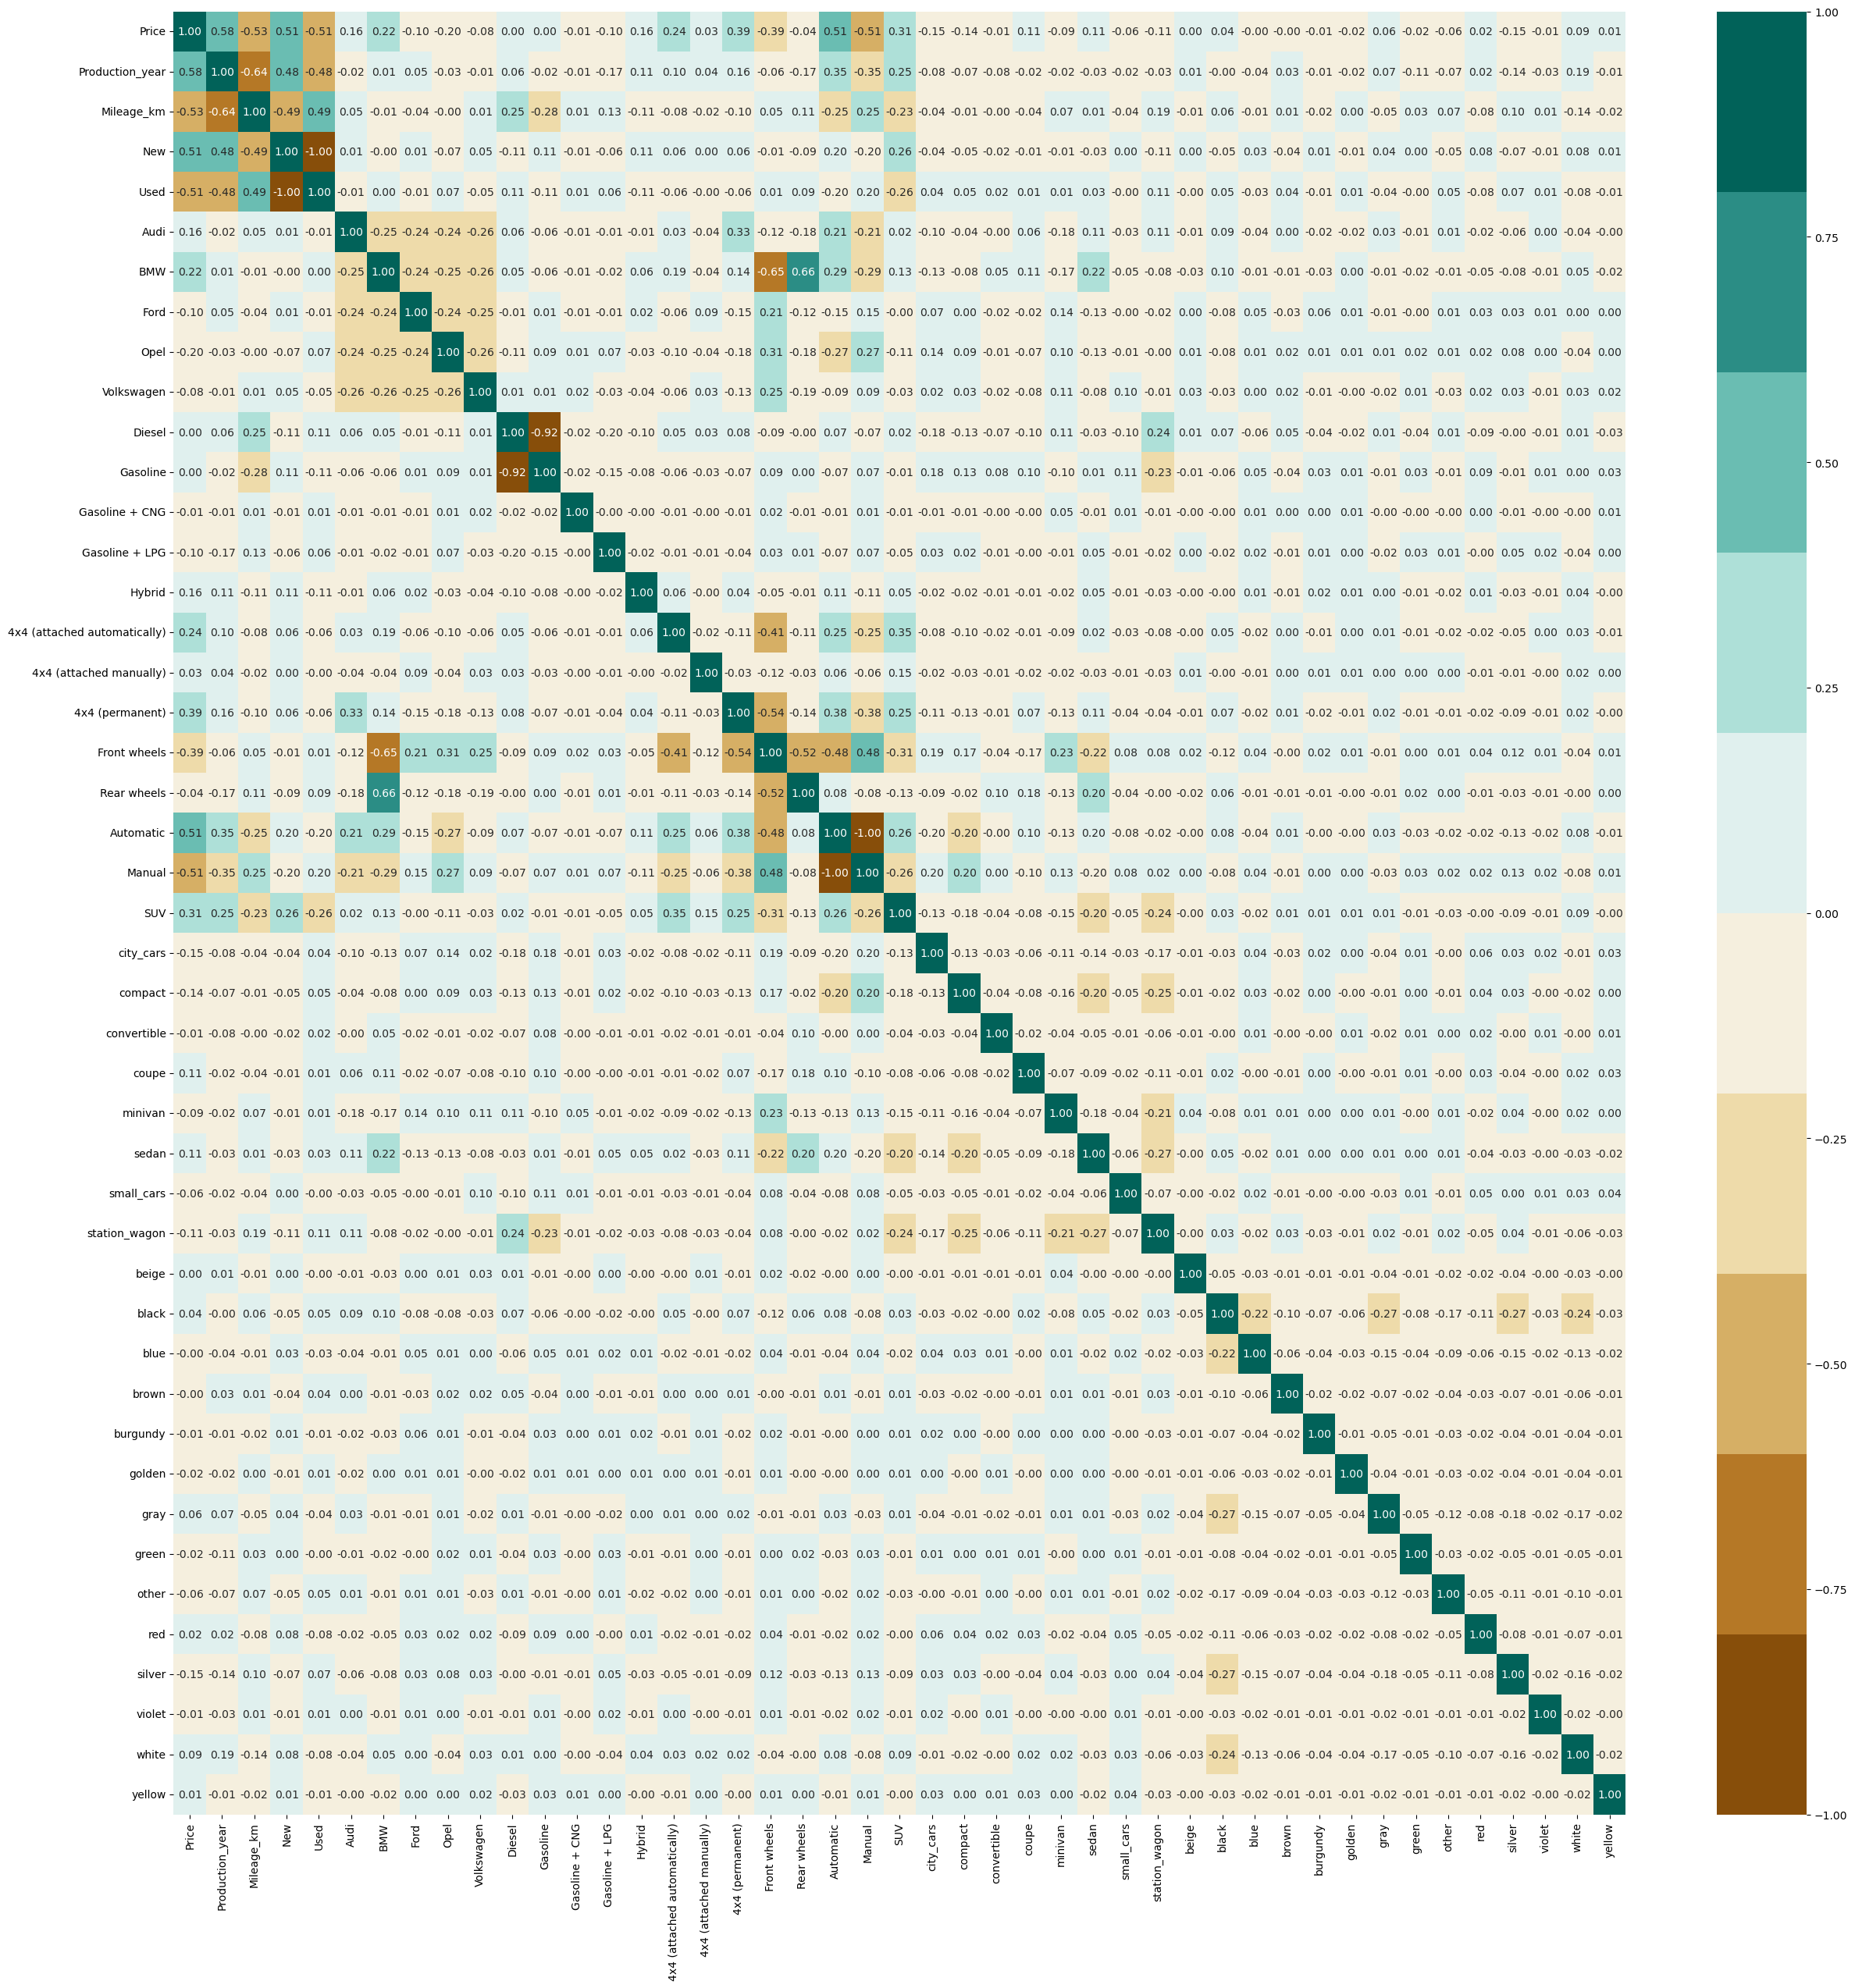

In [239]:
#Macierz korelacji
dataAnalizis.CorrelationMatrix()

In [240]:
test = UnitTests(cars)

test.CheckPriceAbove(800000)
test.CheckProductionYear(1940)
test.CheckNullValues()

Nie, nie ma samochodów o cenie powyżej 800000 .
Nie, nie ma samochodów wyprodukowanych przed 1940 .
W tabeli danych nie ma wartości null.


In [241]:
coach = Coach()

X = cars.drop('Price', axis=1).to_numpy()
y = cars.loc[:, 'Price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21374)

print("OK")

OK


In [251]:
#MODEL 1 - LinearRegresor
from sklearn.linear_model import LinearRegression
linearRegresor = LinearRegression()
accuracy = coach.TrainModel(linearRegresor, X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LinearRegression: ", accuracy)

#MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
randomForestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = coach.TrainModel(randomForestRegressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('RandomForestTree: ' , accuracy)

LinearRegression:  [36133.26165951539, 20476.667437857086]
RandomForestTree:  [16920.819948118733, 7907.251204325049]


<Axes: >

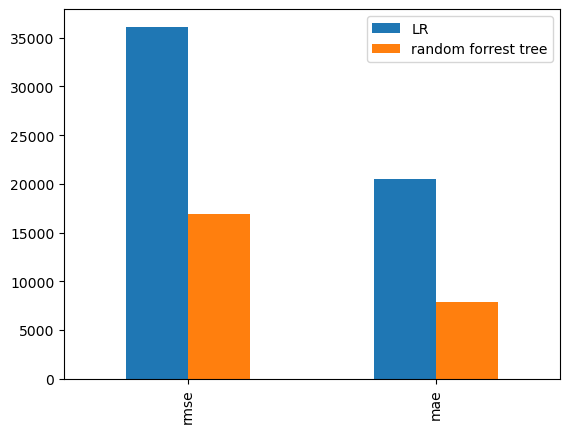

In [252]:
#Compare models
df_compare = pd.DataFrame(accuracy_compare, index = ['rmse', 'mae'])
df_compare.plot(kind='bar')

In [247]:
#Oczekiwana cena 42000zł
randomForestRegressor.predict([[2015,91000,90,1422,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]])

array([37828.96])

In [253]:
#Ford C-MAX
randomForestRegressor.predict([[2007,297000,115,1900,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]])

array([10134.97])

In [254]:
#Audi A4
randomForestRegressor.predict([[2011,190000,140,2000,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0]])

array([35251.91])